
# Data Analysis Project

**Students Names:** Norhan Ali & Amber Mocalis <br>
**Course Name:**  MSBA-601-01 Fund Tech for Bus Analytics (Fall 2024) <br>
**Date:** November 20, 2024 <br>

---

### Project Overview

In this project, you will work in a team of two and utilize what we have learned in this class to preform an analysis on a dataset. 

The data you choose is up to you! I encourage you to select a dataset that fits your area of expertise. Some of the resources for datasets are listed below. Note that these are just resources I've used in the past. You are not limited to these resources, but it's a place to start.<br>
    <br>
    - [kaggle](https://www.kaggle.com/datasets)<br>
    - [data.gov](https://data.gov/)<br>
    - [google datasets](https://datasetsearch.research.google.com/)<br>
    - [SEC datasets](https://www.sec.gov/data-research/sec-markets-data/financial-statement-data-sets)<br>
    - [dataquest](https://www.dataquest.io/blog/free-datasets-for-projects/)<br>

Your dataset must have at LEAST 10,000 rows of data. Additionally, it should have enough attributes to allow for a meaningful analysis and level of complexity (e.g., a dataset with just two columns for "name" and "birthdate" likely is not going to be enough.)

Once you have selected a dataset, you will be required to perform an analysis with a large dataset of at least 10,000 rows. 

The goal is to:

- Import and explore the dataset.
- Clean and prepare the data for analysis.
- Derive at least <mark>6 key insights</mark> from the data using Python and Python libraries. You are welcome to add more coding blocks and more insights. 
- Communicate these insights clearly, professionally, and explain how they can inform decision-making.

---


## 1. Importing Necessary Libraries

### OSPI Enrollment Report Card Datasets

The Office of the Superintendent of Public Instruction (OSPI) maintains a repository of data that is available for public use. In my previous role as the tuition and financial aid director for a private high school, my team and I used data from OSPI to gain understanding of overall student enrollment in Washington State and to guide our strategic enrollment goals and long-term budgeting.


In [ ]:
# Import necessary libraries for assignment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Loading the Dataset


In [ ]:

# Reads OSPI enrollment CSV files into a DataFrame.

def load_enrollment_data(file_path):    
    try:
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        return df
    
    except FileNotFoundError:
        print(f'File not found: {file_path}')
        return None

# Read OSPI Enrollment Data into DataFrames    
df_24 = load_enrollment_data('Report_Card_Enrollment_2023-24.csv')
df_23 = load_enrollment_data('Report_Card_Enrollment_2022-23.csv')
df_22 = load_enrollment_data('Report_Card_Enrollment_2021-22.csv')
df_21 = load_enrollment_data('Report_Card_Enrollment_2020-21.csv')
df_20 = load_enrollment_data('Report_Card_Enrollment_2019-20.csv')




## 3. Data Exploration

Explore the dataset by checking its dimensions, data types, and any missing values.


**Guiding Questions:**
- What columns are available in the data?
- Are there any columns with missing values?
- What data types are present?



In [ ]:
print('Dataframe info:')
print(df_24.info()) # Display info about the data, including shape & column info
print("*"*75)

print('Missing data:')
print(df_24.isnull().sum()) # Display columns with missing data
print("*"*75)

print('Display the first 5 rows of the OSPI dataframe')
print(df_24.head(5)) # Display the first 5 rows of the Dataframe

##### Dimensions

##### Data types

##### Columns

##### Missing Values

---


### Concatenate Dataframes

In order to better understand enrollment trends in the past five years, we concatenated dataframes from FY20 to FY24.

In [ ]:
# Function to reorder columns based on a reference DataFrame (df_24-the most recent OSPI dataset), then concatenate all dataframes
def reorder_and_concat(*dataframes):
    try:
        # Standardize column names to prevent concatenation errors
        for df in dataframes:
            df.columns = df.columns.str.lower()  # Convert to lowercase
            df.columns = df.columns.str.replace(r"[_\-/]", " ", regex=True)  # Replace _, -, or / with a space
        
        # Use the columns from the first DataFrame as the reference
        reference_columns = dataframes[0].columns
        
        # Reorder each DataFrame to match the reference column order
        reordered_dfs = [df[reference_columns] for df in dataframes]
        
        # Concatenate the reordered DataFrames along rows (axis=0)
        concatenated_df = pd.concat(reordered_dfs, axis=0) 
        
        print("Dataframes concatenated successfully.")
        return concatenated_df
    
    except Exception as e:
        print("Columns do not match. Concatenation failed.")
        return None

concat_df = reorder_and_concat(df_24, df_23, df_22, df_21, df_20)


In [ ]:
# Analyze the concatenated dataset to create baseline understanding

print('Dataframe info:')
print(concat_df.info()) # Display info about the data, including shape & column info
print("*"*75)


print('Missing data:')
print(concat_df.isnull().sum()) # Display columns with missing data
print("*"*75)

print('Preview the OSPI dataframe')
print(concat_df) # Display the first 5 rows of the Dataframe



## 4. Data Cleaning

Clean the data to ensure consistency and handle any missing values or outliers.


**Instructions:**
- Describe each cleaning step you take.
- Explain how these changes will improve the analysis.


In [ ]:
# Remove rows with missing or duplicated values from dataframe

cleaned_df = concat_df.dropna()
cleaned_df = cleaned_df.drop_duplicates() 

cleaned_df.shape

By dropping null values, we have reduced the dataframe from 101,812 rows to 78,671 rows 

In [ ]:

cleaned_df = cleaned_df.drop(['american indian  alaskan native', 'asian', 'black  african american',
       'hispanic  latino of any race(s)',
       'native hawaiian  other pacific islander', 'two or more races', 'white',
       'english language learners', 'foster care', 'highly capable',
       'homeless', 'low income', 'migrant', 'military parent', 'mobile',
       'section 504', 'students with disabilities',
       'non english language learners', 'non foster care',
       'non highly capable', 'non homeless', 'non low income', 'non migrant',
       'non military parent', 'non mobile', 'non section 504',
       'students without disabilities'], axis=1)


In [30]:
cleaned_df

,schoolyear,organizationlevel,county,esdname,esdorganizationid,districtcode,districtname,districtorganizationid,schoolcode,schoolname,schoolorganizationid,currentschooltype,gradelevel,all students,female,gender x,male,dataasof
4459,2023-24,School,Adams,Educational Service District 101,100001.0,1109.0,Washtucna School District,100287.0,3075.0,Washtucna Elementary/High School,100326.0,P,10th Grade,5,4,0,1,06/18/2024 12:00:00 AM
4460,2023-24,School,Adams,Educational Service District 101,100001.0,1109.0,Washtucna School District,100287.0,3075.0,Washtucna Elementary/High School,100326.0,P,11th Grade,9,5,0,4,06/18/2024 12:00:00 AM
4461,2023-24,School,Adams,Educational Service District 101,100001.0,1109.0,Washtucna School District,100287.0,3075.0,Washtucna Elementary/High School,100326.0,P,12th Grade,6,3,0,3,06/18/2024 12:00:00 AM
4462,2023-24,School,Adams,Educational Service District 101,100001.0,1109.0,Washtucna School District,100287.0,3075.0,Washtucna Elementary/High School,100326.0,P,1st Grade,3,2,0,1,06/18/2024 12:00:00 AM
4463,2023-24,School,Adams,Educational Service District 101,100001.0,1109.0,Washtucna School District,100287.0,3075.0,Washtucna Elementary/High School,100326.0,P,2nd Grade,5,3,0,2,06/18/2024 12:00:00 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19918,2019-20,School,Yakima,Educational Service District 105,100002.0,39209.0,Mount Adams School District,100155.0,2532.0,White Swan High School,103299.0,P,10th Grade,58,30,0,28,12/22/23 0:00
19919,2019-20,School,Yakima,Educational Service District 105,100002.0,39209.0,Mount Adams School District,100155.0,2532.0,White Swan High School,103299.0,P,11th Grade,51,25,0,26,12/22/23 0:00
19920,2019-20,School,Yakima,Educational Service District 105,100002.0,39209.0,Mount Adams School District,100155.0,2532.0,White Swan High School,103299.0,P,12th Grade,60,26,0,34,12/22/23 0:00
19921,2019-20,School,Yakima,Educational Service District 105,100002.0,39209.0,Mount Adams School District,100155.0,2532.0,White Swan High School,103299.0,P,9th Grade,58,31,0,27,12/22/23 0:00



## 5. Data Visualization

Use visualization to better understand the data and spot trends. Include <mark>at least two visualizations</mark>.


**Guiding Questions:**
- What patterns do you see?
- How can these patterns contribute to further insights?


### Enrollment Trends

Using merged datasets from above, produce plot line of enrollment change from 2020 to present.

In [ ]:
enrollment_data = concat_df.pivot_table(values="all students", index="gradelevel", columns="schoolyear", aggfunc="sum")
enrollment_data = enrollment_data.style.format("{:,.0f}") # formats pivot table for readability

enrollment_data

schoolyear,2019-20,2020-21,2021-22,2022-23,2023-24
gradelevel,,,,,
10th Grade,"254,388","252,623","255,172","262,937","265,338"
11th Grade,"251,069","251,600","250,576","255,672","263,905"
12th Grade,"275,432","276,238","277,512","272,163","277,827"
1st Grade,"251,459","235,838","225,131","241,768","233,226"
2nd Grade,"250,192","239,346","237,209","230,877","245,417"
3rd Grade,"253,673","239,170","239,620","240,405","234,714"
4th Grade,"253,641","243,503","238,308","242,552","243,331"
5th Grade,"261,489","245,145","241,945","241,056","245,036"
6th Grade,"265,736","252,822","242,345","242,393","241,771"


In [63]:
enrollment_data = concat_df.pivot_table(values="all students", index="gradelevel", columns="schoolyear", aggfunc="sum")

# Specify order of grades in pivot table & filter out unwanted grade levels
custom_index_order = [
    'Kindergarten', '1st Grade', '2nd Grade', '3rd Grade', '4th Grade', 
    '5th Grade', '6th Grade', '7th Grade', '8th Grade', '9th Grade', '10th Grade', 
    '11th Grade', '12th Grade']

filtered_enrollment_data = enrollment_data.query('gradelevel != "Half-day Kindergarten"').query('gradelevel != "Pre-Kindergarten"').query('gradelevel != "All Grades"').reindex(custom_index_order)

filtered_enrollment_data

schoolyear,2019-20,2020-21,2021-22,2022-23,2023-24
gradelevel,,,,,
Kindergarten,247736,209837,234771,231279,228336
1st Grade,251459,235838,225131,241768,233226
2nd Grade,250192,239346,237209,230877,245417
3rd Grade,253673,239170,239620,240405,234714
4th Grade,253641,243503,238308,242552,243331
5th Grade,261489,245145,241945,241056,245036
6th Grade,265736,252822,242345,242393,241771
7th Grade,264680,259456,251233,243645,244126
8th Grade,256834,260194,257550,252558,246330


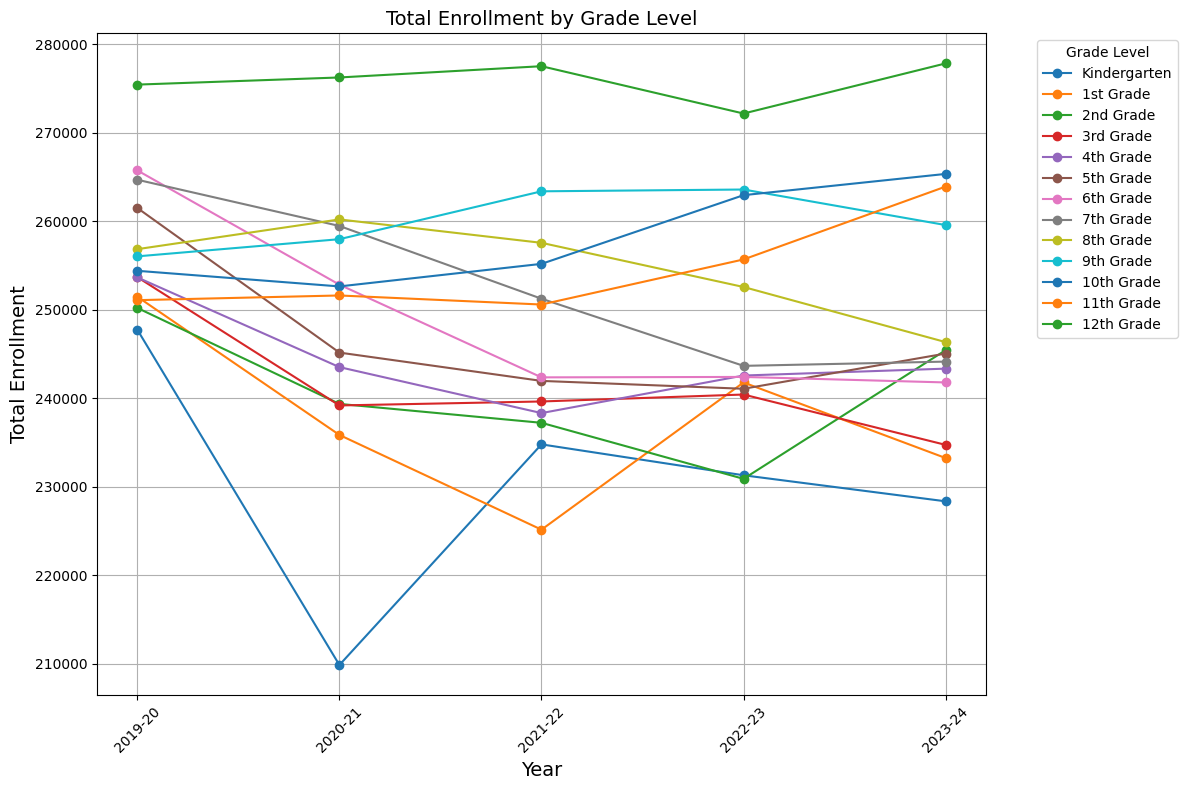

In [71]:
# Plot the data
plt.figure(figsize=(12, 8))

for grade in filtered_enrollment_data.index:
    plt.plot(filtered_enrollment_data.columns, filtered_enrollment_data.loc[grade], marker='o', label=grade)
    
plt.title('Total Enrollment by Grade Level', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Enrollment', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for visibility
plt.legend(title='Grade Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
enrollment_data = concat_df.pivot_table(values="All Students", index=["SchoolName","GradeLevel"], columns=["County","SchoolYear"], aggfunc="sum", fill_value=0)
enrollment_data = enrollment_data.style.format("{:,.0f}")

enrollment_data

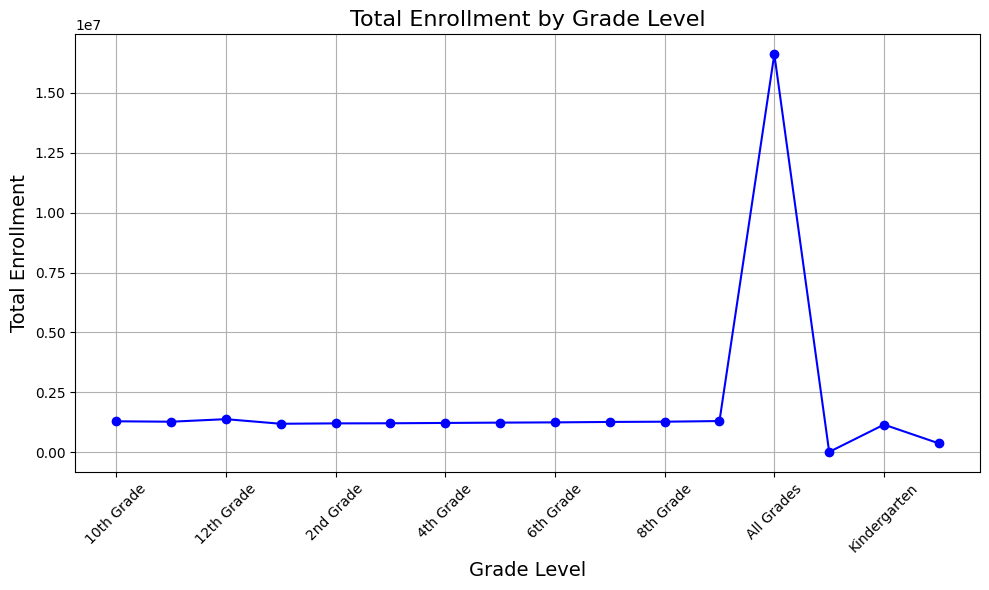

In [ ]:
filtered_df = df[~df['GradeLevel'].isin(['All Students', 'Half-day Kindergarten'])] # Filter out 'All Students' and 'Half-day Kindergarten' from the grade level
    
# Group by grade level and find total enrollment by grade level
grade_enrollment = concat_df.groupby('gradelevel')['all students'].sum()
    
# Plot the data
plt.figure(figsize=(10, 6))
grade_enrollment.plot(kind='line', marker='o', color='b')
    
plt.title('Total Enrollment by Grade Level', fontsize=16)
plt.xlabel('Grade Level', fontsize=14)
plt.ylabel('Total Enrollment', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()



#### Bonus Data Visualization

Check out this district map from the National Center for Education Statistics __[NCES School District Boundaries for Washington State](https://data-nces.opendata.arcgis.com/datasets/95738ddb2b784336a60aff23312ff480_0/explore?filters=eyJTVEFURUZQIjpbIjUzIl19&location=47.320653%2C-120.046795%2C7.46)__


## 6. Deriving Insights

In this section, derive six insights from the data. Each insight should have:
- A brief description of what you are examining.
- The code used to calculate or visualize it.
- A short analysis of the results and how they contribute to understanding the data.
- Visuals can be used to aid your insights as well.

### Business Questions for Analysis (from Amber)

- How is enrollment trending since 2020/post-COVID era (2020-2021, 2021-2022, 2022-2023, 2023-2024)
    - by grade
- Can we see a heatmap of enrollment increases/decreases across school districts?
- Isolate Spokane area schools and do same analysis as above
    - may require school - zip code dataset to cross-reference
    - is Spokane County good enough for aggregation?



### Insight 1

**Insight Description:** _[Describe what you are trying to learn from this analysis.]_ <br>
**Analysis:** _[Describe what this insight tells you and how it can inform decisions.]_<br>


In [ ]:
# Code for Insight


### Insight 2

**Insight Description:** _[Describe what you are trying to learn from this analysis.]_ <br>
**Analysis:** _[Describe what this insight tells you and how it can inform decisions.]_<br>


In [ ]:
# Code for Insight


### Insight 3

**Insight Description:** _[Describe what you are trying to learn from this analysis.]_ <br>
**Analysis:** _[Describe what this insight tells you and how it can inform decisions.]_<br>


In [ ]:
# Code for Insight


### Insight 4

**Insight Description:** _[Describe what you are trying to learn from this analysis.]_ <br>
**Analysis:** _[Describe what this insight tells you and how it can inform decisions.]_<br>


In [ ]:
# Code for Insight


### Insight 5

**Insight Description:** _[Describe what you are trying to learn from this analysis.]_ <br>
**Analysis:** _[Describe what this insight tells you and how it can inform decisions.]_<br>


In [ ]:
# Code for Insight


### Insight 6

**Insight Description:** _[Describe what you are trying to learn from this analysis.]_ <br>
**Analysis:** _[Describe what this insight tells you and how it can inform decisions.]_<br>


In [ ]:
# Code for Insight


## 7. Summary and Conclusions

Summarize your findings and highlight the most impactful insights you derived from the data.

**Guiding Questions:**
- What key takeaways did you learn from this data?
- How can these insights inform future decisions?
- Are there any limitations in your analysis?

**Insight Description:** _[Describe what you are trying to learn from this analysis.]_ <br>
**Analysis:** _[Describe what this insight tells you and how it can inform decisions.]_<br>



## 8. Projections

Finally, tell us something that can be learned from this analysis to make better decisions going forward. 

**Insight Description:** _[Describe what you are trying to learn from this analysis.]_ <br>
**Analysis:** _[Describe what this insight tells you and how it can inform decisions.]_<br>


**Instructions for Submission:**

- Submit the completed `.ipynb` file, dataset, and link to dataset in Canvas.


## Grading Critiria

Below are some of the critiria that I will be using when grading the final case. Keep in mind, no one part has a specific weight.

| **Section**          | **Description**                                                                                                                                             |
|----------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Dataset Quality**  | Does the dataset meet the length and complexity requirements?                                                                                               |
| **Data Ingestion**   | Demonstrates a well-structured process using Python to import, explore, and clean the data.                                                                 |
| **Data Cleanup**     | Clearly explains how data was cleaned (if necessary) to prepare it for analysis.                                                                            |
| **Analysis**         | - Utilizes a variety of modules and functions to analyze the cleaned dataset.                                                                               |
|                      | - You and your partner must provide at least six (6) insights derived from the analysis.                                                                    |
|                      | - Insights should reveal something not initially obvious from the raw data.                                                                                 |
|                      | - Present each insight with code execution, printed data tables, visuals, etc., and explain the process and significance.                                   |
| **Conclusion**       | Synthesizes your insights to explain the overall story the data tells.                                                                                      |
|                      | Discusses the importance of the data and general conclusions that can be drawn.                                                                             |
| **Projection**       | Takes the analysis further by considering its application in a real-world context.                                                                          |
|                      | Provides recommendations for stakeholders on how the findings can inform better, more informed decisions in the future.                                     |
|----------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Overall Presentation Quality**                     | How descriptive your explanations in the file are and the verbal presentation piece.                                    |
